# Stock Price Prediction using Linear Regression

Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence.

Let’s see how to predict stock prices using Machine Learning and the python programming language. I will start this task by importing all the necessary python libraries that we need for this task:

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Preperation

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1= df['close']

In [5]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

### Data Scaling

Before scaling the data we have to reshape it

In [6]:
df1= np.array(df1)
df1=df1.reshape(-1,1)

In [7]:
df1.reshape(-1, 1)

array([[132.045],
       [131.78 ],
       [130.28 ],
       ...,
       [319.23 ],
       [316.85 ],
       [318.89 ]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df1)

In [9]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


### Splitting Data into Test & Train

In [10]:
df1.shape

(1258, 1)

spliting 65 percent data for training with sequence

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
train_data.shape

(817, 1)

In [13]:
test_data.shape

(441, 1)

In [14]:
training_size, test_size

(817, 441)

In [15]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

### Convert Array of Matrix -> Dataset Matrix

In [16]:
import numpy

In [17]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
X_test.shape

(340, 100)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

## Model Building

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predictions and Model Evaluation

In [23]:
predictions= model.predict(X_test)

In [24]:
print("Predicted Value",predictions[:10][0])
print("Expected Value",y_test[:10][0])

Predicted Value 0.2659124126209654
Expected Value 0.2727349489149709


In [25]:
pred_df= pd.DataFrame(predictions)

In [26]:
pred_df['TrueValues']=y_test
# pred_df.head()

In [27]:
new_pred_df=pred_df.rename(columns={0: 'Predictions'})

In [28]:
new_pred_df.head()

,Predictions,TrueValues
0,0.265912,0.272735
1,0.267869,0.276619
2,0.289373,0.280672
3,0.286837,0.265811
4,0.264365,0.268429


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Predictions Vs True Values on Testing Set')

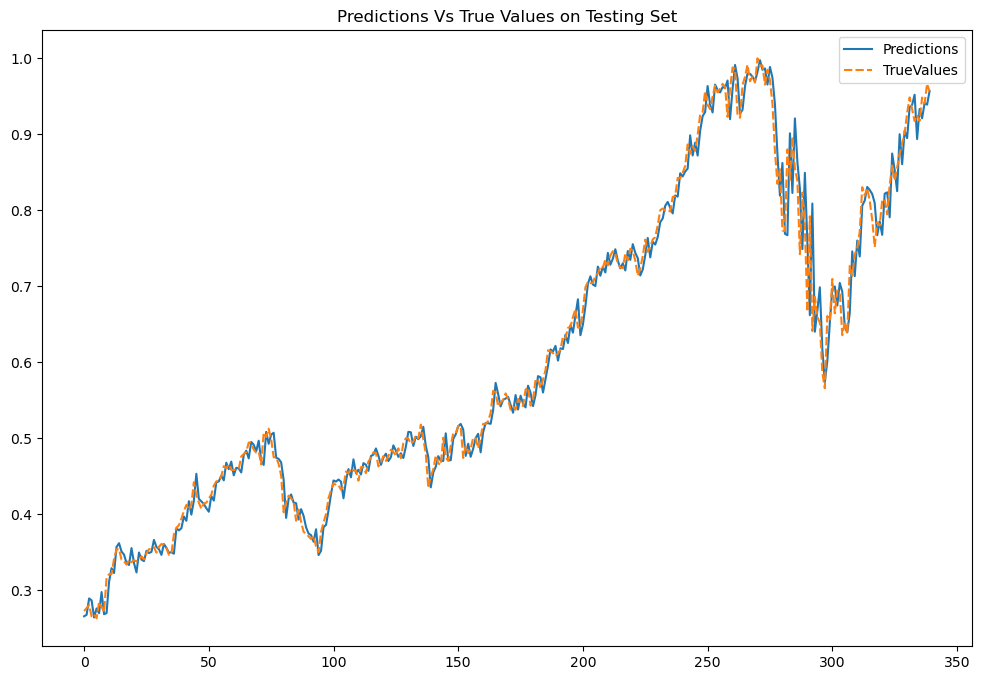

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(data=new_pred_df)
plt.title("Predictions Vs True Values on Testing Set")

In [33]:
print("Model Accuracy is on training data:",model.score(X_train, y_train))

Model Accuracy is on training data: 0.9970342320018716


In [34]:
#on Testing data
print(model.score(X_test, y_test))

0.9847722212152704


In [35]:
X_train[2][-1]

0.0903065101747868

In [36]:
y_train[1]

0.0903065101747868

## Predictions & Performance Metrics

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=train_predict.reshape(-1, 1)
test_predict=test_predict.reshape(-1, 1)

#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.1363100026703

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

238.13157949250504

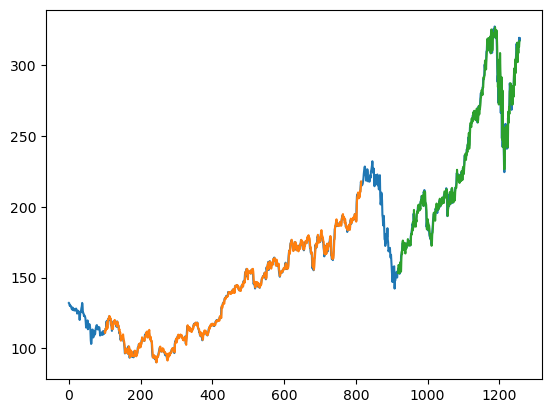

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Prediction for Next 10 days

In [41]:
len(test_data)

441

In [42]:
x_input = test_data[341:]
x_input.shape

(100, 1)

In [43]:
x_input=x_input.reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input = list(x_input)
temp_input= temp_input[0].tolist()

In [45]:
len(temp_input)

100

In [46]:
yhat= model.predict(x_input)

In [47]:
temp_input.extend([yhat[0].tolist()])
# temp_input=temp_input[1:]

In [48]:
lst_output=[]

In [49]:
lst_output.extend([yhat.tolist()])

In [50]:
lst_output

[[0.9820245634844119]]

In [51]:
x_input = np.array(temp_input[1:])

In [52]:
x_input=x_input.reshape(x_input.shape[0], -1)

In [53]:
x_input=x_input.reshape(1,-1)

In [54]:
x_input.shape

(1, 100)

In [55]:
yhat = model.predict(x_input)

In [56]:
yhat

array([0.97188536])

#### Display 10 Day Prediction

In [62]:
import numpy as np
import pandas as pd

lst_output = []
n_steps = 100
i = 0

output_table = []

while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        
        print("{} day input: {}".format(i, x_input))
        print("{} day output: {}".format(i, yhat))
        
        temp_input.extend([yhat[0].tolist()])
        temp_input = temp_input[1:]
        lst_output.extend([yhat.tolist()])
        
        output_table.append([i, yhat[0]])
        
        i += 1
    
    else:
        yhat = model.predict(x_input)
        temp_input.extend([yhat[0].tolist()])
        lst_output.extend([yhat.tolist()])
        
        output_table.append([i, yhat[0]])
        
        i += 1

print(lst_output)

0 day input: [[0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
  0.96635143 0.9563033  0.96491598 0.98202456 0.97188536 0.97209897
  0.95857035 0.97054873 0.95994414 0.98049691 0.98294279 0.96385792
  0.97158516 0.96467027 0.97701736 0.95609124 0.95971168 0.94564823
  0.94763488 0.95855879 0.9672527  0.9681693  0.99251774 0.97246167
  0.97463433 0.97299241 0.96940152 0.97203379 0.98159373 0.96572438
  0.95494976 0.9732422  0.95056484 0.95427143 0.95674533 0.93970429
  0.94264386 0.95989025 0.96218651 0.96999177 0.98030124 0.97766009
  0.95871925 0.97253035 0.98095421 0.98033158 0.9734574  0.99125436
  0.97604183 0.99072203 1.00579882 0.99865513 1.02111152 1.0036367
  1.0082606  1.00902252 1.01570838 1.01038408 1.01083631 1.00991329
  1.01644472 1.03505774 1.02977235 1.0429112  1.04935428 1.05102181
  1.06136467 1.06203764 1.06930609 1.07410588 1.07450293 1.06983904
  1.06886642 1.08113821 1.07422226 1.07574484 1.08719337 1.08928019
  1.08881528 1.10004013 1.10487387 1

In [63]:
# Final Prediction Per Day
df = pd.DataFrame(output_table, columns=["Day Number", "Prediction"])
print(df)

    Day Number  Prediction
0            0    1.133099
1            1    1.131709
2            2    1.136456
3            3    1.146550
4            4    1.146344
5            5    1.147687
6            6    1.151925
7            7    1.150379
8            8    1.155273
9            9    1.162028
10          10    1.159523
11          11    1.156687
12          12    1.164808
13          13    1.157988
14          14    1.165197
15          15    1.171385
16          16    1.166227
17          17    1.169555
18          18    1.170608
19          19    1.175989
20          20    1.179308
21          21    1.185957
22          22    1.184734
23          23    1.187125
24          24    1.190168
25          25    1.195547
26          26    1.196060
27          27    1.202470
28          28    1.203599
29          29    1.203524


In [64]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

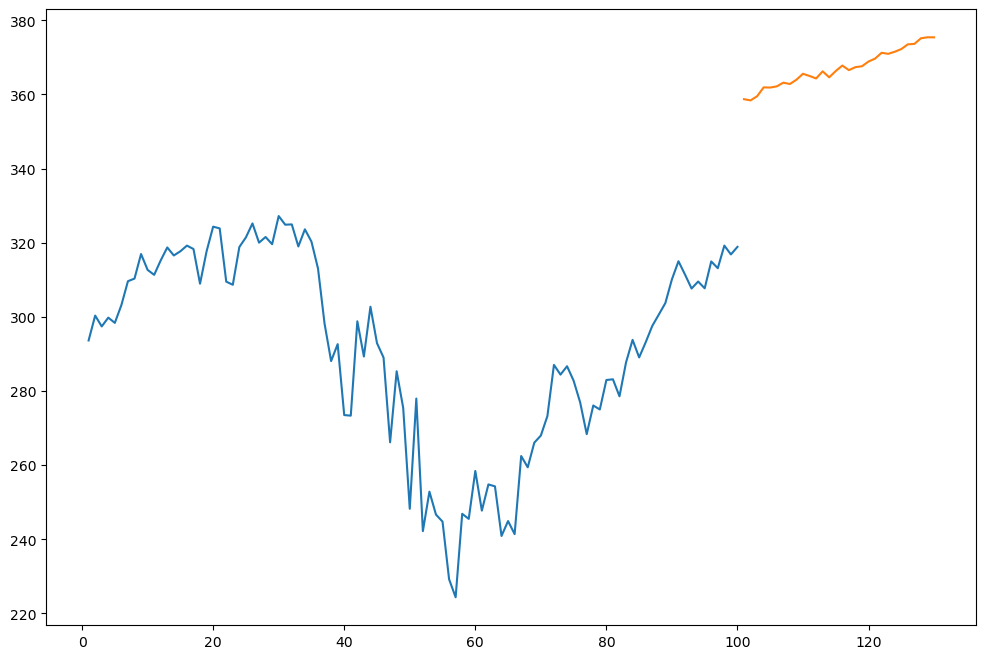

In [65]:
plt.figure(figsize=(12,8))
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))